In [1]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
## Get the APPLE stock data

df = pd.read_csv('/content/AAPL.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
0,2016-01-04,25.65,26.34,25.50,26.34,24.44,270597600,0.070389,1133.0
1,2016-01-05,26.44,26.46,25.60,25.68,23.83,223164000,0.133635,1430.0
2,2016-01-06,25.14,25.59,24.97,25.17,23.36,273829600,0.072042,1949.0
3,2016-01-07,24.67,25.03,24.11,24.11,22.38,324377600,0.074369,2289.0
4,2016-01-08,24.64,24.78,24.19,24.24,22.50,283192000,0.051595,2235.0
...,...,...,...,...,...,...,...,...,...
1183,2020-09-15,118.33,118.83,113.61,115.54,115.54,184642000,NaN,NaN
1184,2020-09-16,115.23,116.00,112.04,112.13,112.13,154679000,NaN,NaN
1185,2020-09-17,109.72,112.20,108.71,110.34,110.34,178011000,NaN,NaN
1186,2020-09-18,110.40,110.88,106.09,106.84,106.84,287104900,NaN,NaN


In [6]:
print(df.head())
print(df.shape)

         Date   Open   High    Low  Close  Adj Close     Volume  ts_polarity  \
0  2016-01-04  25.65  26.34  25.50  26.34      24.44  270597600     0.070389   
1  2016-01-05  26.44  26.46  25.60  25.68      23.83  223164000     0.133635   
2  2016-01-06  25.14  25.59  24.97  25.17      23.36  273829600     0.072042   
3  2016-01-07  24.67  25.03  24.11  24.11      22.38  324377600     0.074369   
4  2016-01-08  24.64  24.78  24.19  24.24      22.50  283192000     0.051595   

   twitter_volume  
0          1133.0  
1          1430.0  
2          1949.0  
3          2289.0  
4          2235.0  
(1188, 9)


In [7]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()


In [50]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

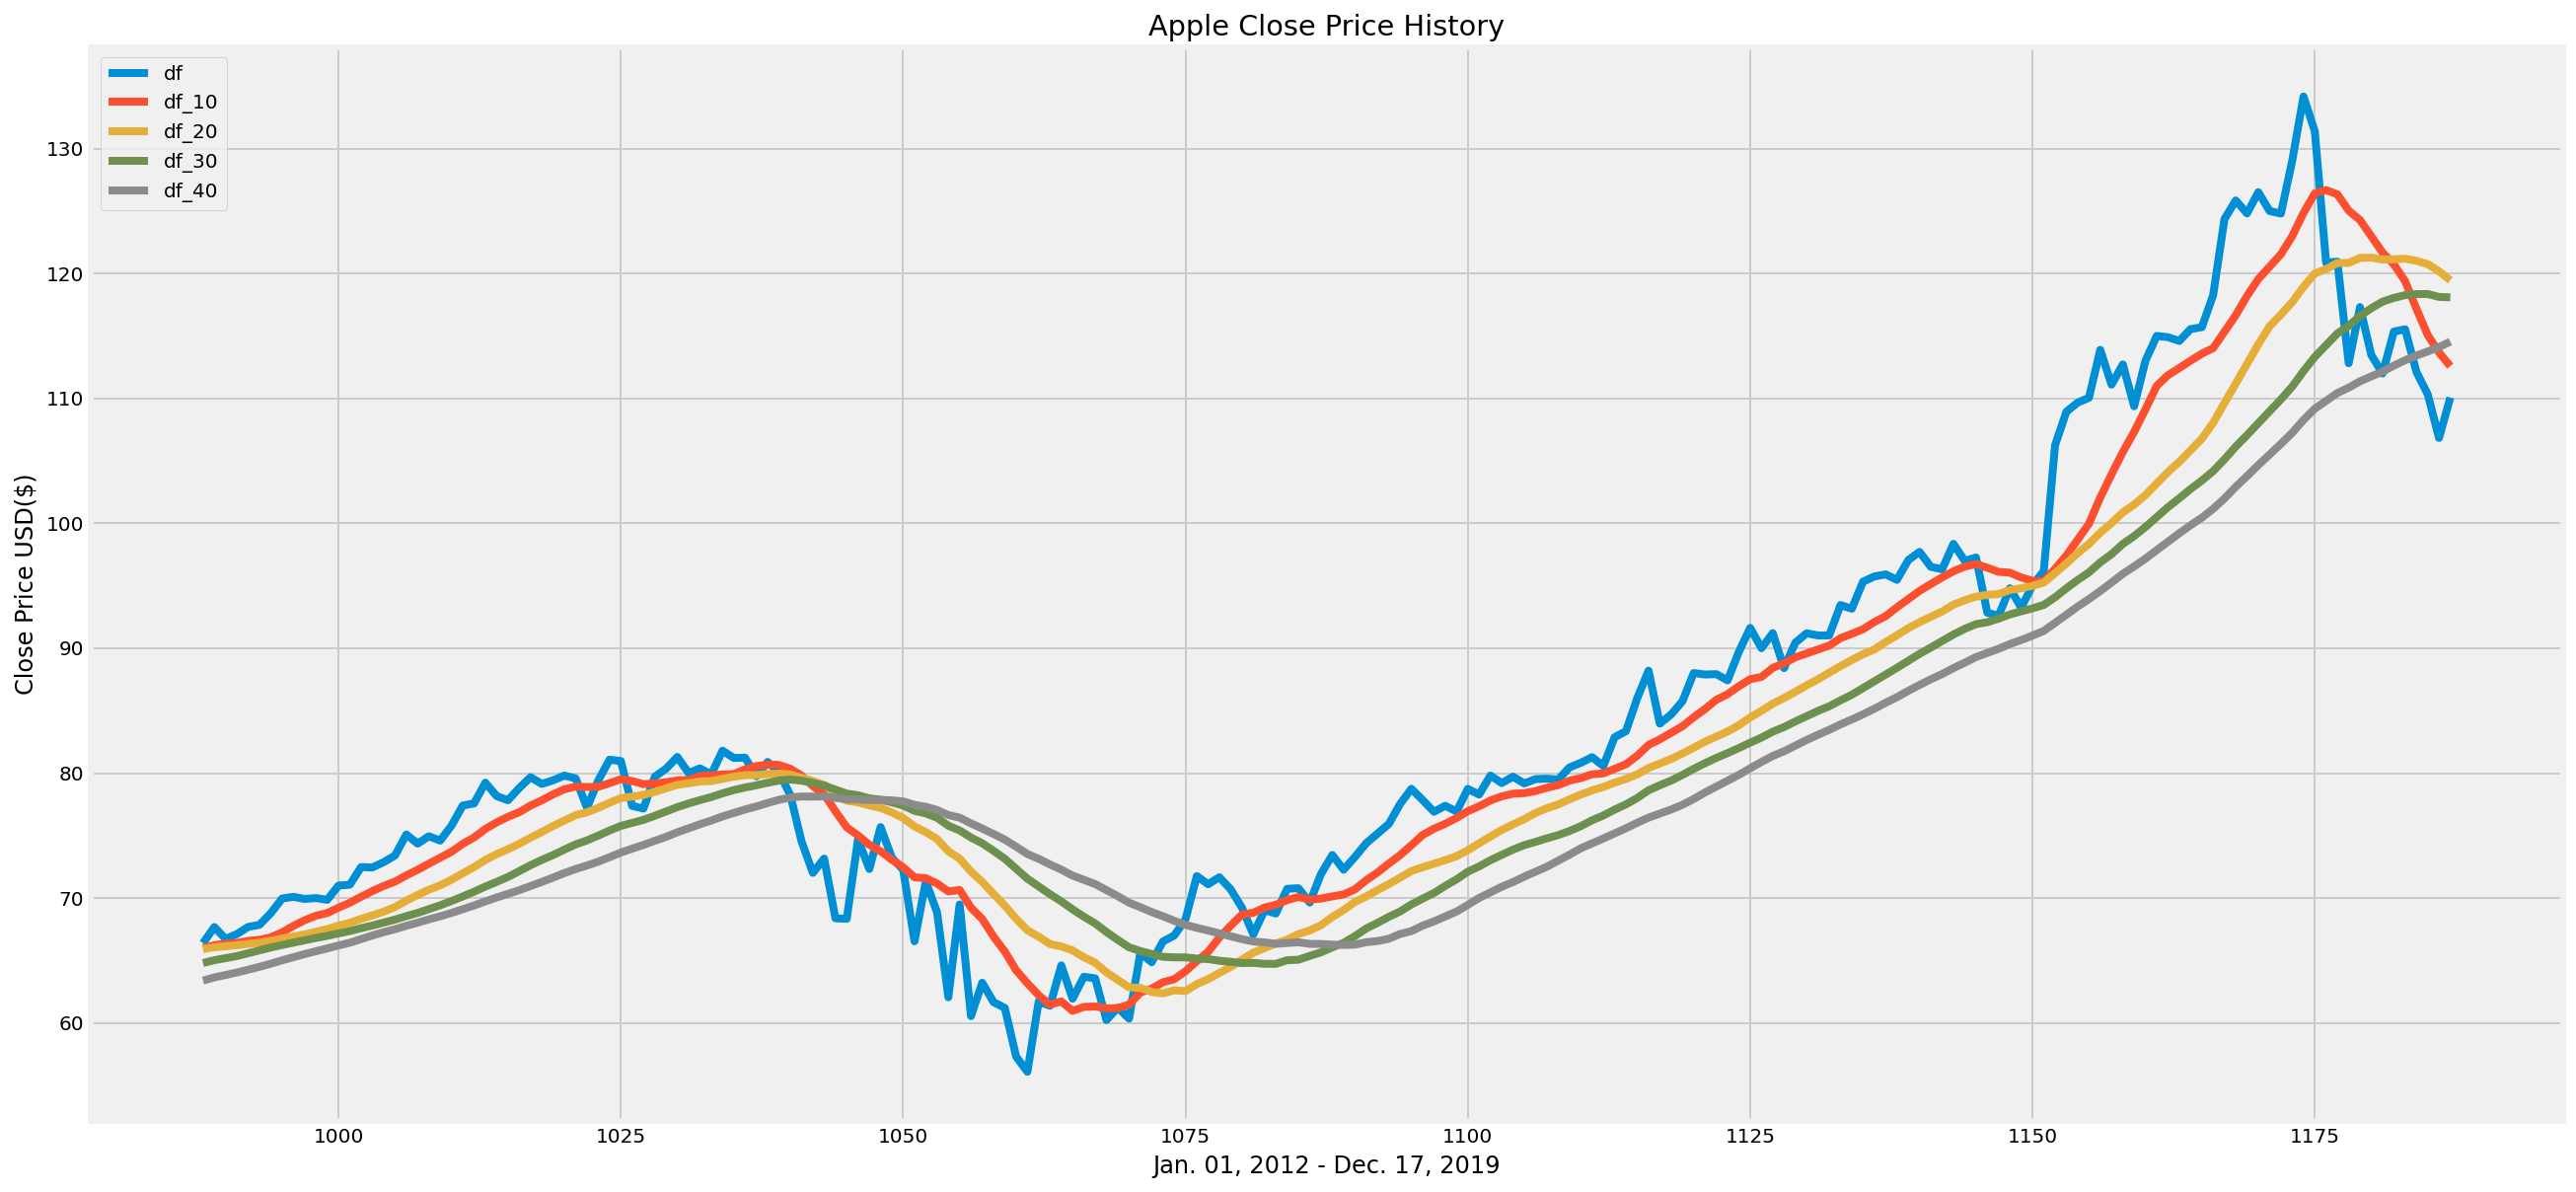

In [9]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [10]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data.head()

,Close
0,26.34
1,25.68
2,25.17
3,24.11
4,24.24


In [11]:
#Convert the dataframe to a numpy array
dataset = data.values

In [12]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

951

In [13]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.03369176],
        [0.02777778],
        [0.02320789],
        ...,
        [0.78637993],
        [0.75501792],
        [0.78405018]]), (1188, 1))

In [14]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.03369176, 0.02777778, 0.02320789, 0.01370968, 0.01487455,
       0.01836918, 0.02159498, 0.01586022, 0.02060932, 0.01523297,
       0.01424731, 0.01451613, 0.01344086, 0.02491039, 0.02043011,
       0.02168459, 0.00698925, 0.00842294, 0.015681  , 0.01370968,
       0.009319  , 0.01353047, 0.0140681 , 0.00824373, 0.01048387,
       0.01048387, 0.00887097, 0.00752688, 0.00824373, 0.01415771,
       0.01747312, 0.01335125, 0.01281362, 0.01469534, 0.00976703,
       0.01299283, 0.01442652, 0.01478495, 0.01424731, 0.02284946,
       0.0233871 , 0.02508961, 0.02840502, 0.02589606, 0.02401434,
       0.02419355, 0.02428315, 0.02679211, 0.02732975, 0.03198925,
       0.03503584, 0.03467742, 0.03494624, 0.03494624, 0.03673835,
       0.03539427, 0.0344086 , 0.03333333, 0.03888889, 0.04310036])]
[0.04184587813620072]

[array([0.03369176, 0.02777778, 0.02320789, 0.01370968, 0.01487455,
       0.01836918, 0.02159498, 0.01586022, 0.02060932, 0.01523297,
       0.01424731, 0.01451613, 0.01

In [15]:
#Conver the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(891, 60, 1)

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
891/891 [==============================] - 32s 32ms/step - loss: 4.6998e-04
Epoch 2/10
891/891 [==============================] - 37s 42ms/step - loss: 2.0024e-04
Epoch 3/10
891/891 [==============================] - 25s 28ms/step - loss: 1.5038e-04
Epoch 4/10
891/891 [==============================] - 25s 28ms/step - loss: 1.3551e-04
Epoch 5/10
891/891 [==============================] - 25s 28ms/step - loss: 1.3342e-04
Epoch 6/10
891/891 [==============================] - 26s 29ms/step - loss: 1.0872e-04
Epoch 7/10
891/891 [==============================] - 26s 29ms/step - loss: 9.4010e-05
Epoch 8/10
891/891 [==============================] - 25s 28ms/step - loss: 9.5959e-05
Epoch 9/10
891/891 [==============================] - 26s 29ms/step - loss: 8.6135e-05
Epoch 10/10
891/891 [==============================] - 25s 28ms/step - loss: 8.3286e-05


In [20]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [21]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [22]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 19ms/step


In [24]:
print(predictions[0:5], y_test[0:5])

[[58.97115 ]
 [58.801342]
 [58.814274]
 [58.568478]
 [58.83102 ]] [[58.97]
 [58.83]
 [58.59]
 [58.82]
 [59.1 ]]


In [25]:
# Get the MSE & RMSE
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(0.05598199087768814, 0.23660513704839153)

<ipython-input-26-549ceefe4e21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


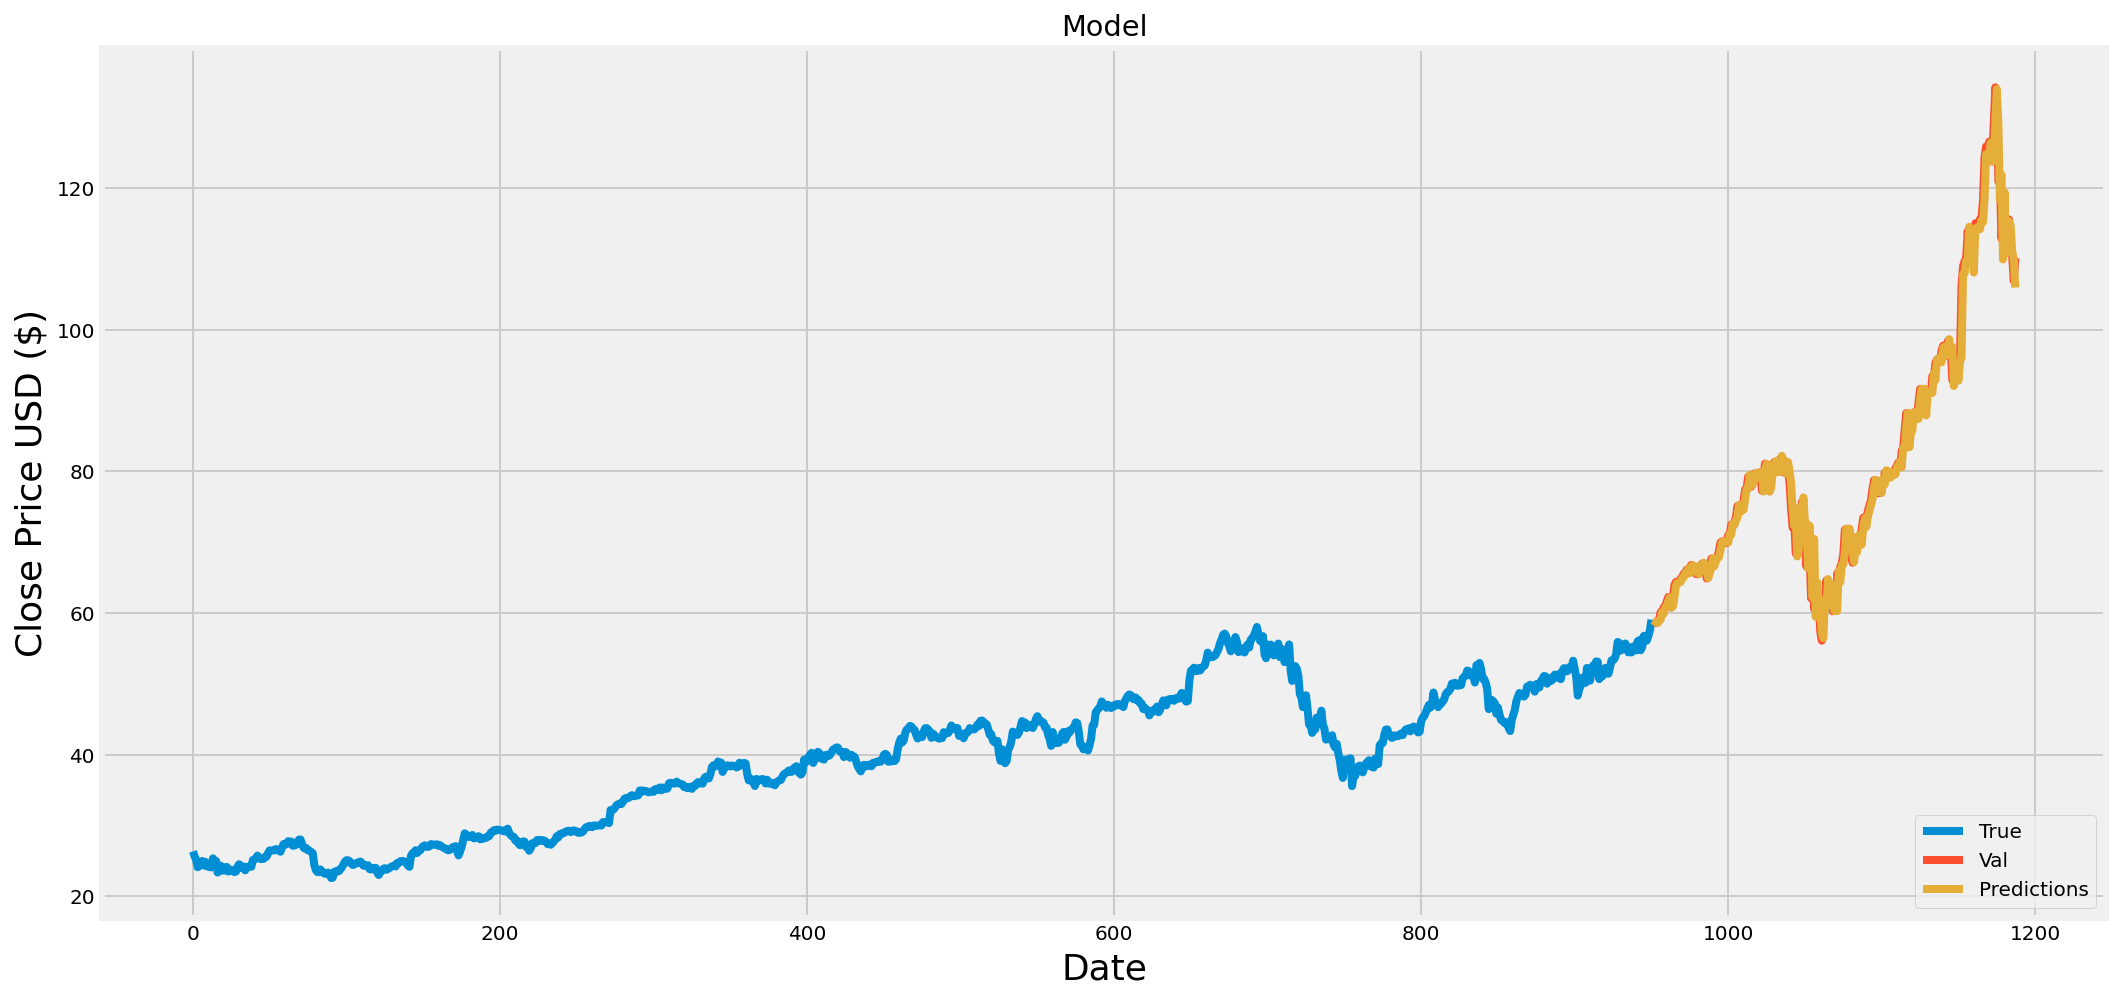

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

**APPLE price prediction using ARIMA Model**

Load EDA libraries

In [67]:
import numpy as np 
import pandas as pd 
import os
import pandas_datareader as web
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
warnings.filterwarnings('ignore')
     

<ipython-input-67-c951c082172d>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [68]:
df = pd.read_csv('/content/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
0,2016-01-04,25.65,26.34,25.50,26.34,24.44,270597600,0.070389,1133.0
1,2016-01-05,26.44,26.46,25.60,25.68,23.83,223164000,0.133635,1430.0
2,2016-01-06,25.14,25.59,24.97,25.17,23.36,273829600,0.072042,1949.0
3,2016-01-07,24.67,25.03,24.11,24.11,22.38,324377600,0.074369,2289.0
4,2016-01-08,24.64,24.78,24.19,24.24,22.50,283192000,0.051595,2235.0
...,...,...,...,...,...,...,...,...,...
1183,2020-09-15,118.33,118.83,113.61,115.54,115.54,184642000,NaN,NaN
1184,2020-09-16,115.23,116.00,112.04,112.13,112.13,154679000,NaN,NaN
1185,2020-09-17,109.72,112.20,108.71,110.34,110.34,178011000,NaN,NaN
1186,2020-09-18,110.40,110.88,106.09,106.84,106.84,287104900,NaN,NaN


In [69]:
## Get the number of rows and columns
df = df.reset_index()

In [70]:
df.shape, df.tail(), df.columns


((1188, 10),
       index        Date    Open    High     Low   Close  Adj Close     Volume  \
 1183   1183  2020-09-15  118.33  118.83  113.61  115.54     115.54  184642000   
 1184   1184  2020-09-16  115.23  116.00  112.04  112.13     112.13  154679000   
 1185   1185  2020-09-17  109.72  112.20  108.71  110.34     110.34  178011000   
 1186   1186  2020-09-18  110.40  110.88  106.09  106.84     106.84  287104900   
 1187   1187  2020-09-21  104.54  110.19  103.10  110.08     110.08  195050000   
 
       ts_polarity  twitter_volume  
 1183          NaN             NaN  
 1184          NaN             NaN  
 1185          NaN             NaN  
 1186          NaN             NaN  
 1187          NaN             NaN  ,
 Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'ts_polarity', 'twitter_volume'],
       dtype='object'))

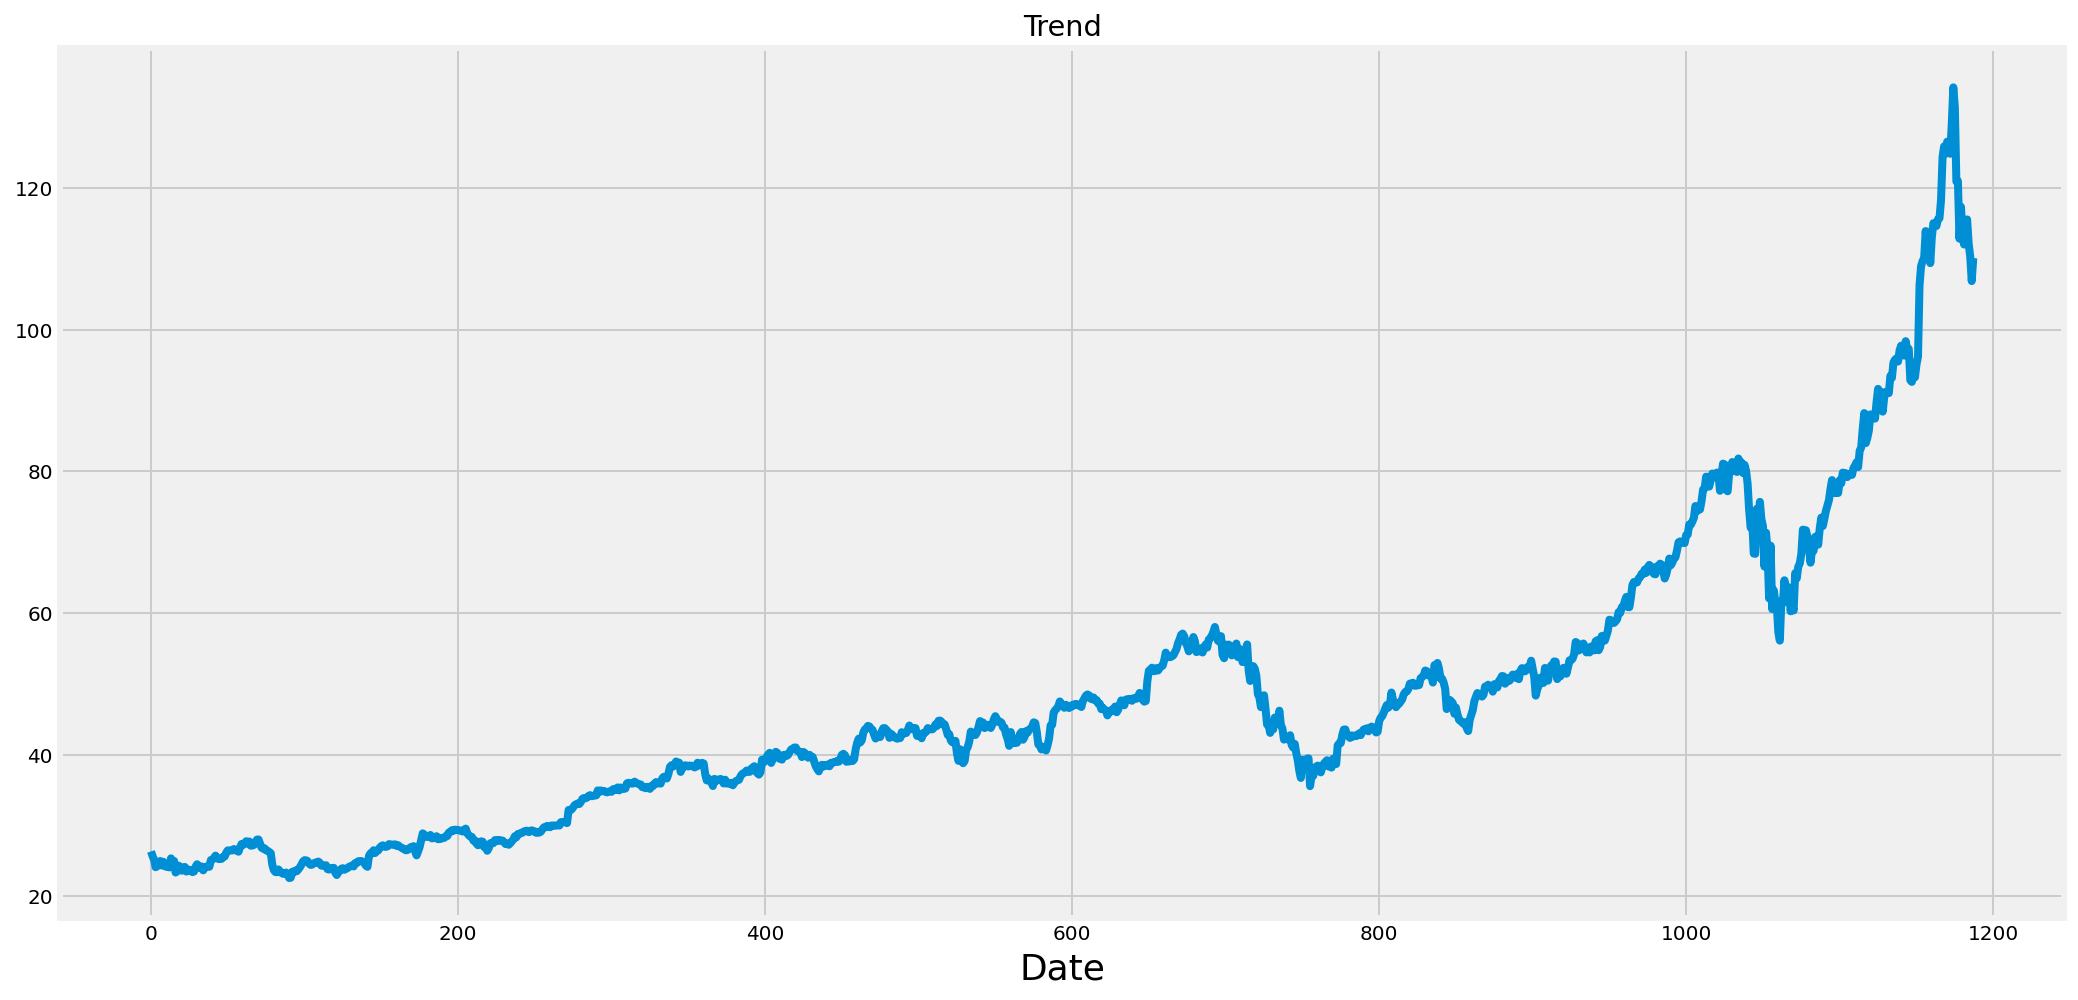

In [73]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.show()

In [74]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [75]:
test_result = adfuller(df['Close'])

In [76]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")
     

In [77]:
adfuller_test(df['Close'])

ADF Test Statistics : -0.10416107361488539
p-value : 0.9490224940211692
#Lags Used : 22
Number of Observations Used : 1165
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary


In [78]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)

In [79]:
df['Close_shift'] = df['Close_shift'].fillna(method='bfill')
df['Close_shift']

0      -0.66
1      -0.66
2      -0.51
3      -1.06
4       0.13
        ... 
1183    0.18
1184   -3.41
1185   -1.79
1186   -3.50
1187    3.24
Name: Close_shift, Length: 1188, dtype: float64

In [80]:
test_result = adfuller(df['Close_shift'])

In [81]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [82]:
adfuller_test(df['Close_shift'])

ADF Test Statistics : -6.131029997262747
p-value : 8.40123793069311e-08
#Lags Used : 23
Number of Observations Used : 1164
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


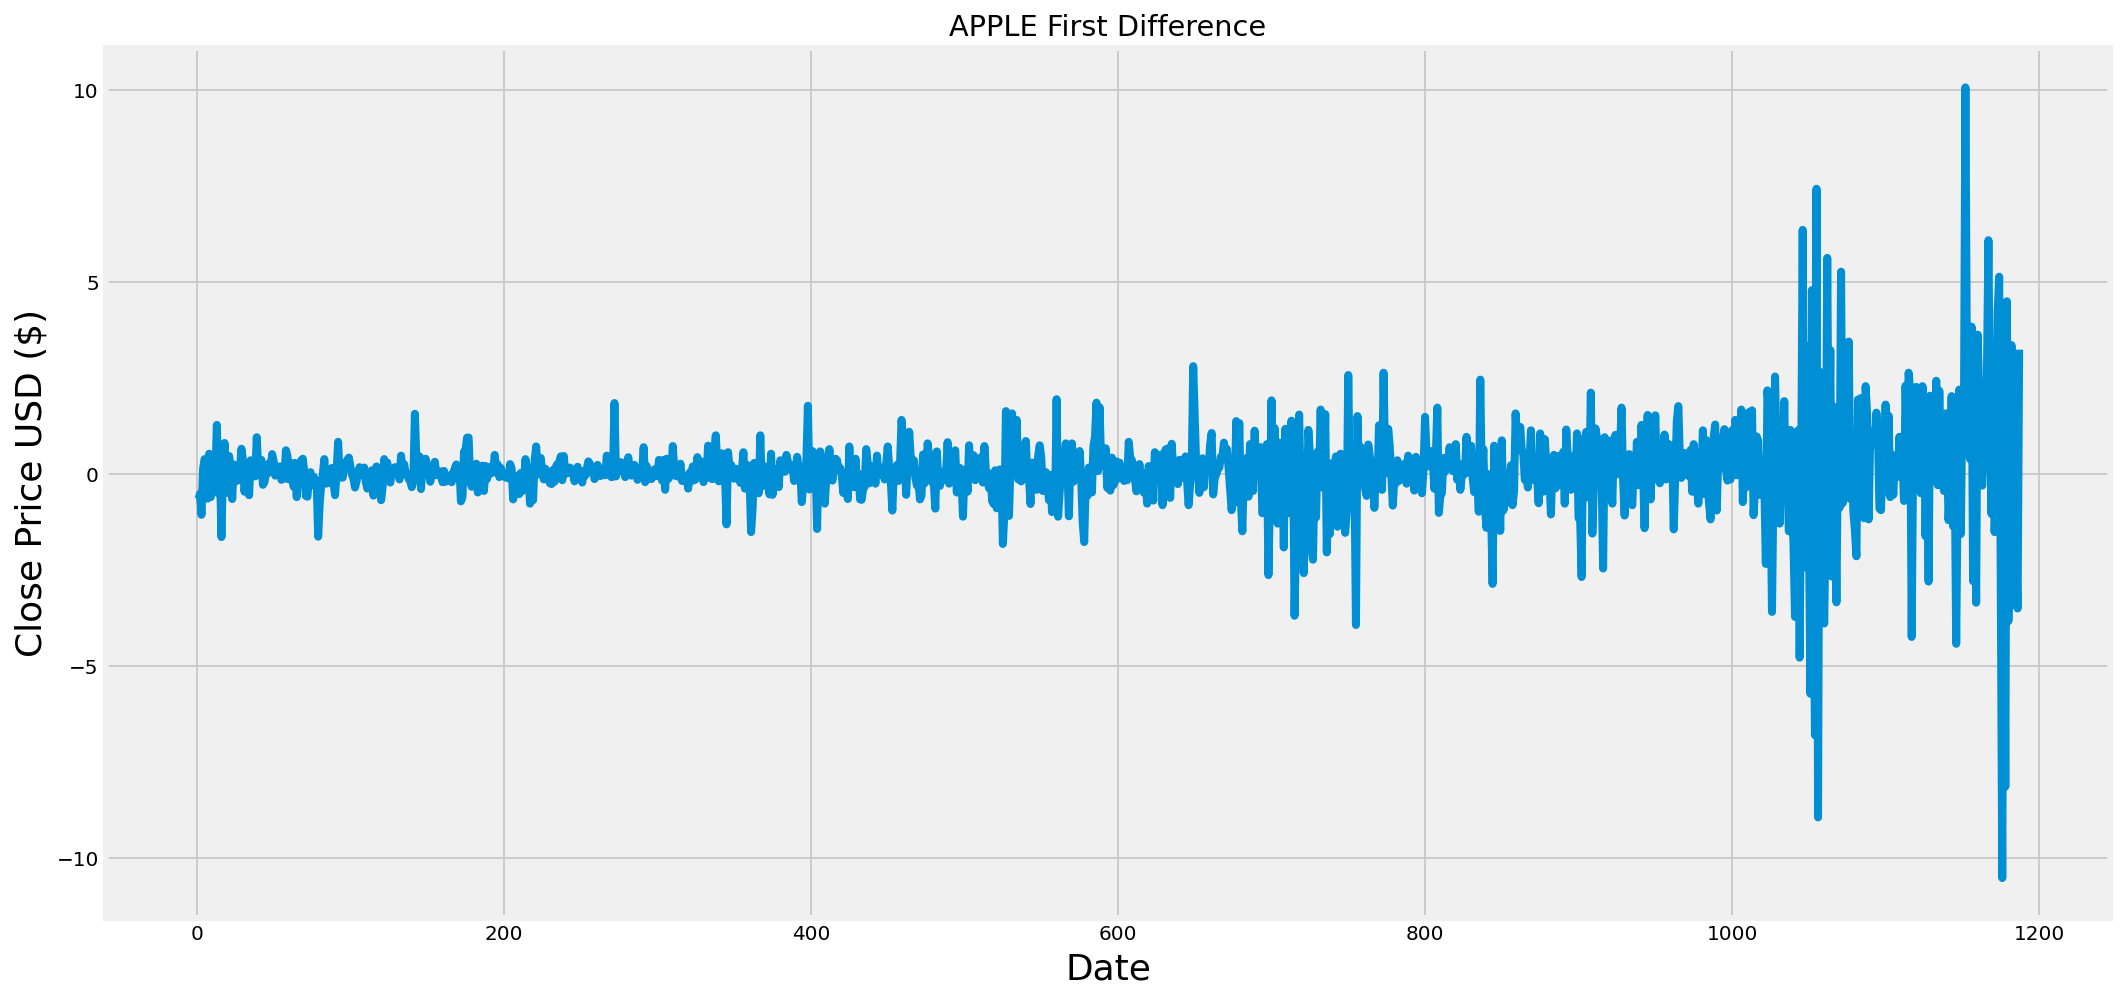

In [84]:
plt.figure(figsize=(16,8))
plt.plot(df['Close_shift'])
plt.title("APPLE First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

**Auto Regressive Model**

In [85]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

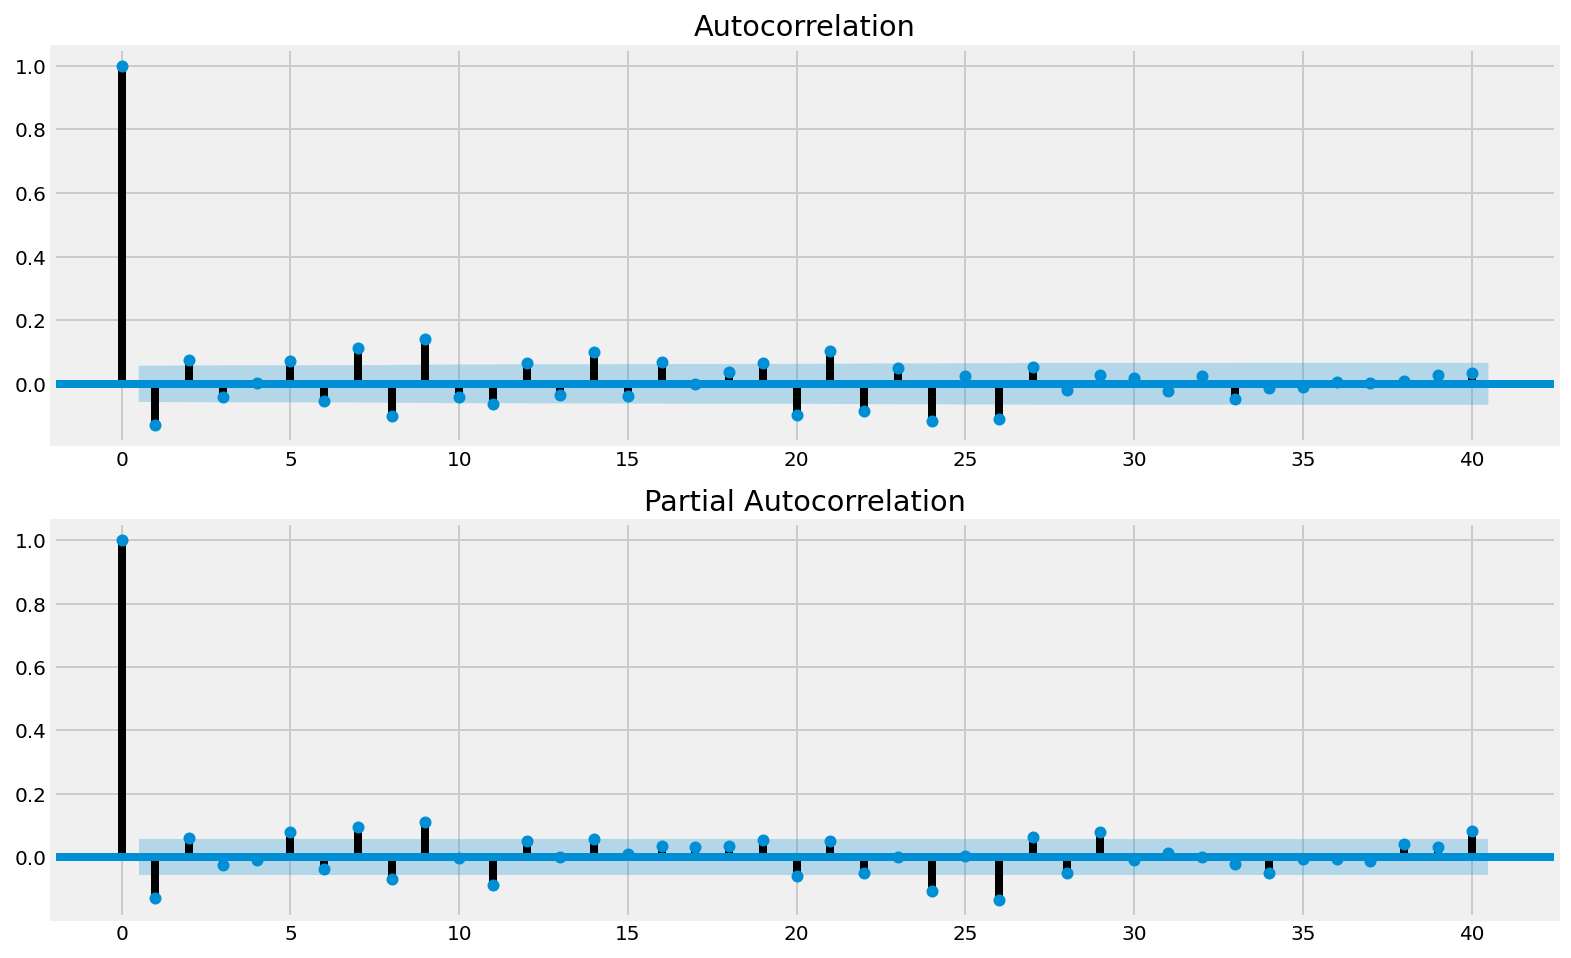

In [86]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close_shift'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close_shift'].iloc[1:],lags=40,ax=ax2)

**ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction**

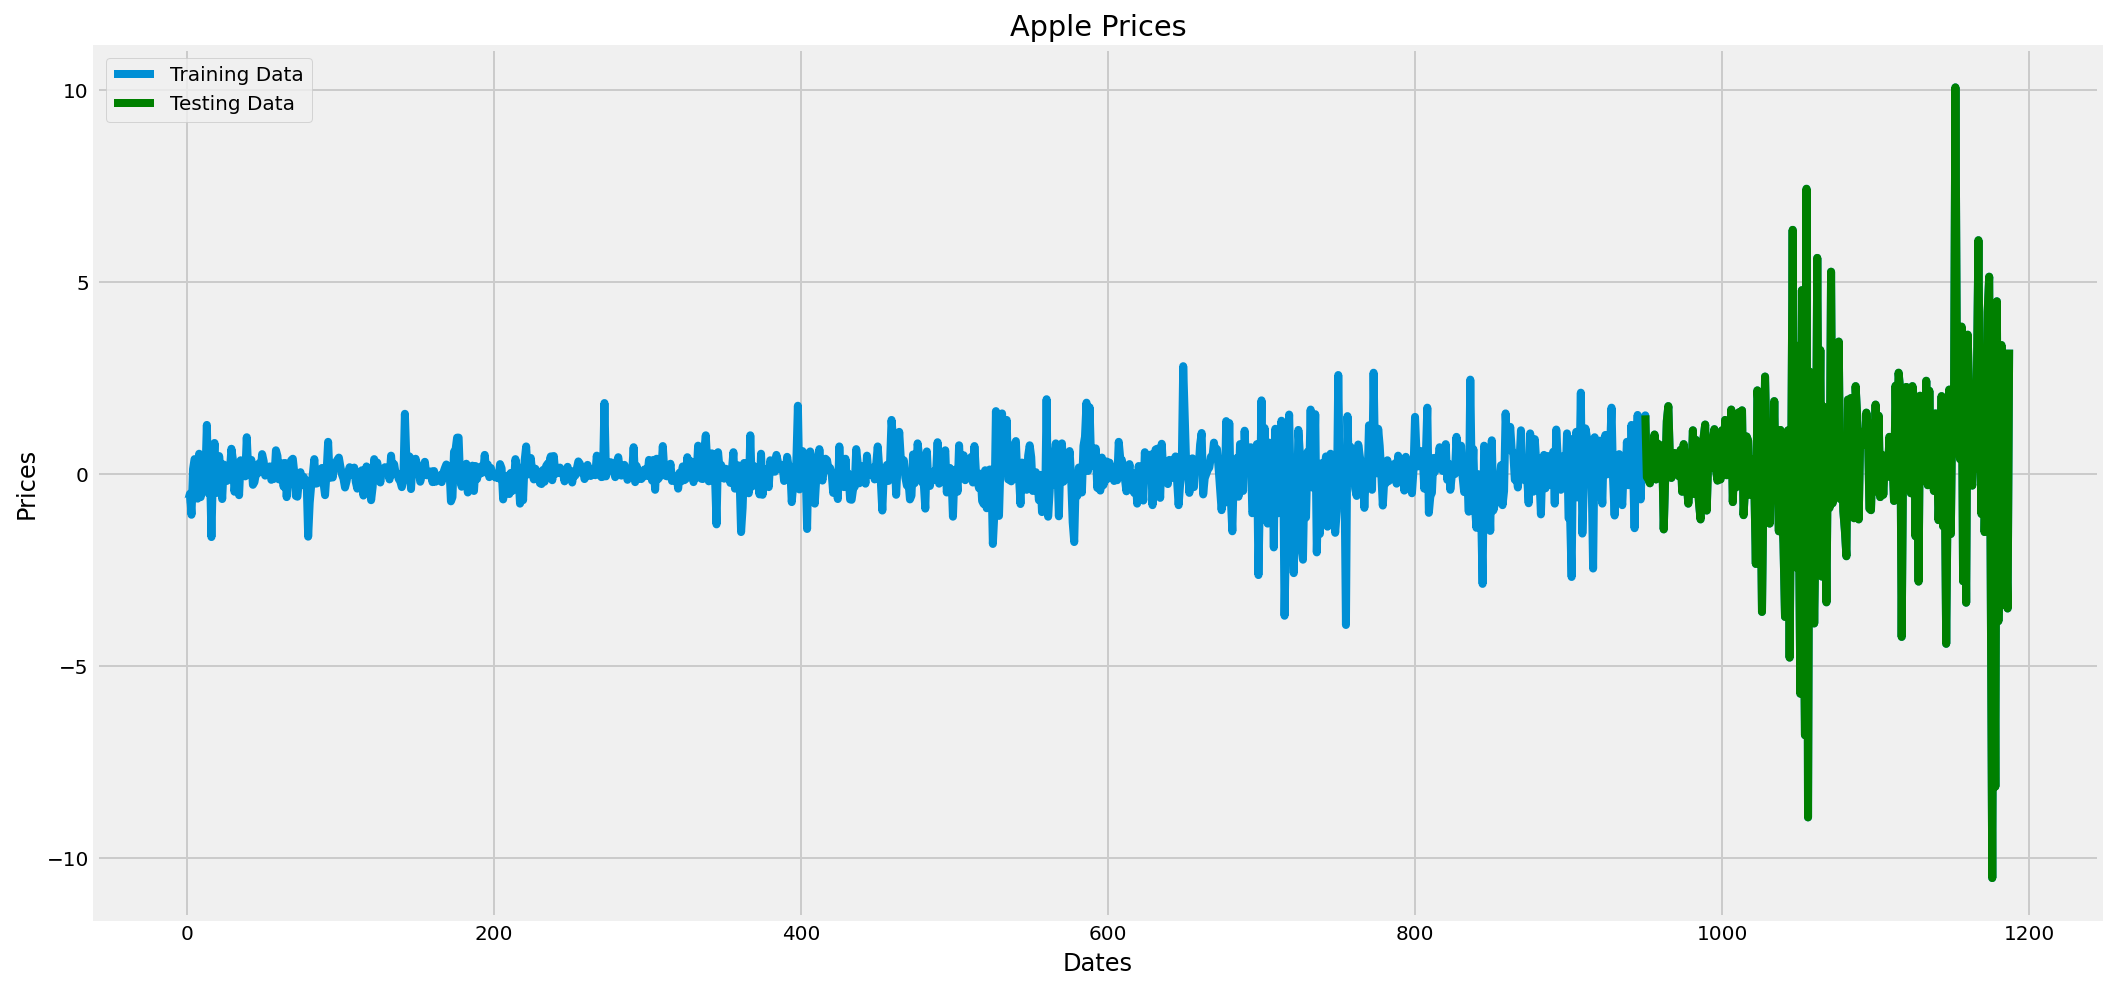

In [88]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close_shift'], label='Training Data')
plt.plot(test_data['Close_shift'], 'green', label='Testing Data')

plt.legend()

In [89]:
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [90]:
#model=ARIMA(train_data['Close_shift'],order=(1,1,1))
model=ARIMA(df['Close_shift'],order=(1,0,1))
model_fit=model.fit()

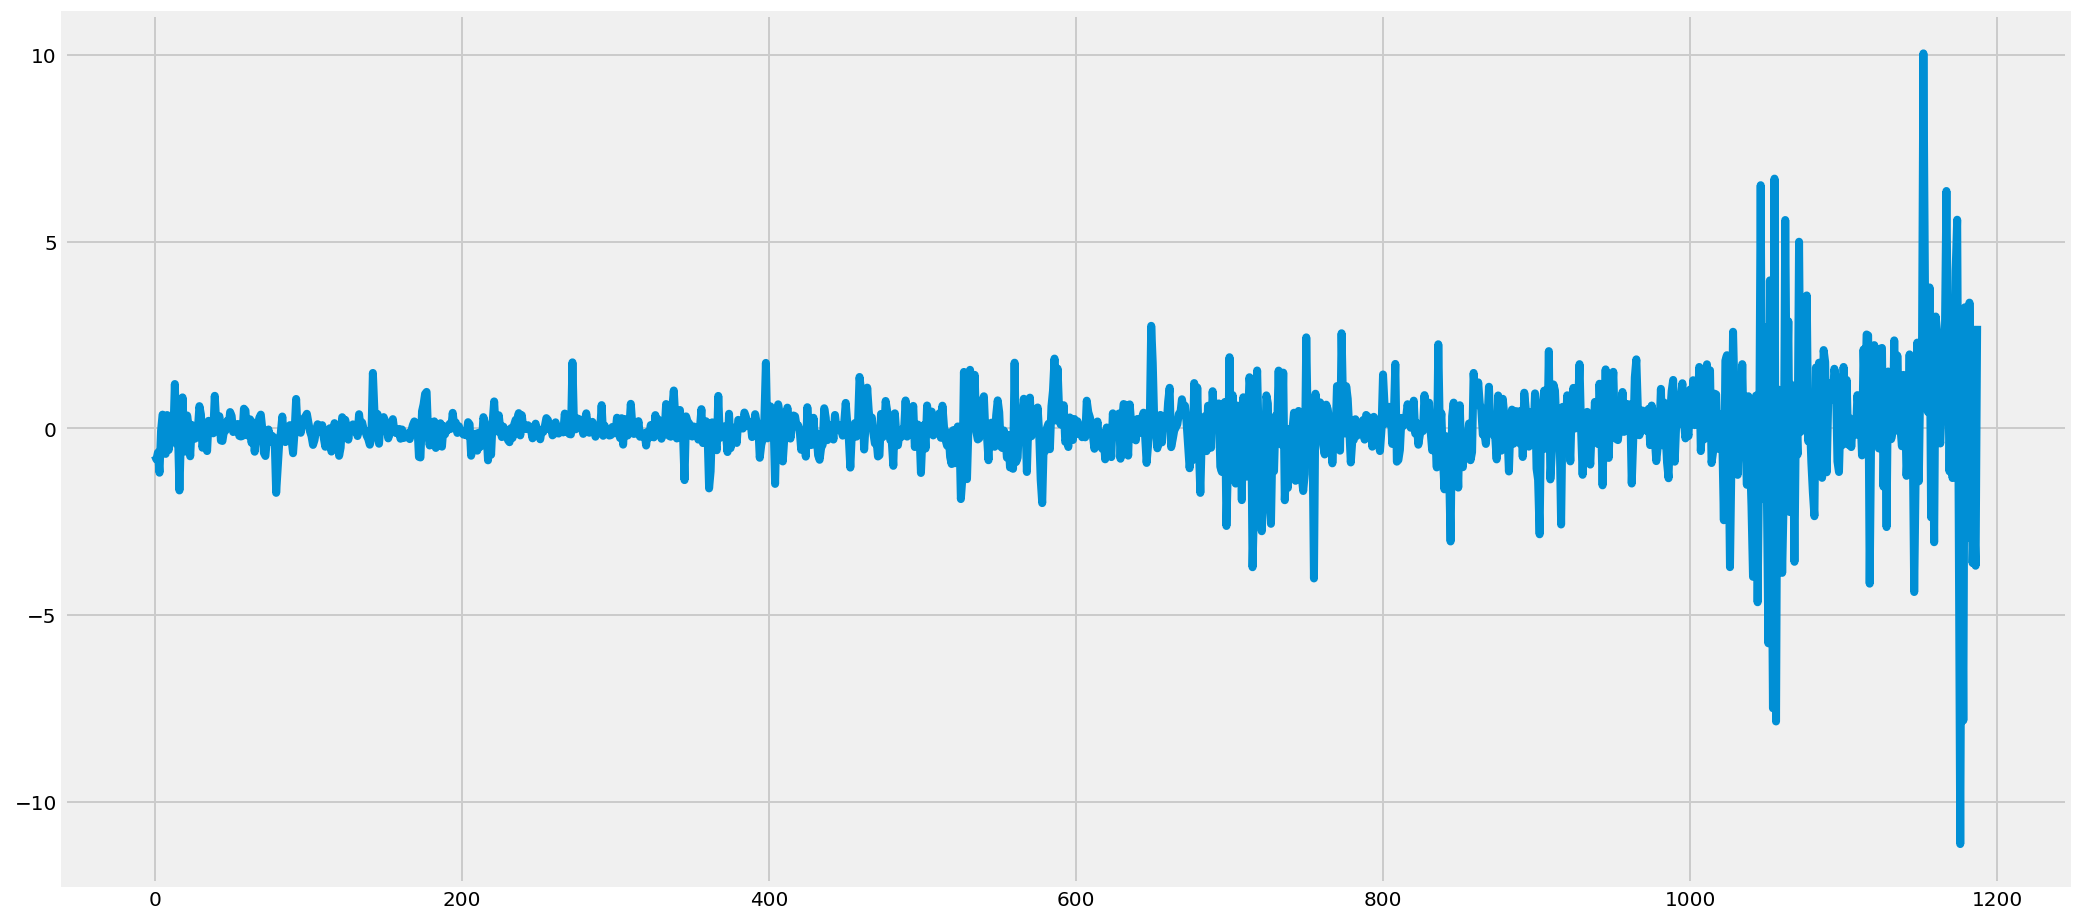

In [91]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
#residuals.plot()
plt.plot(residuals)

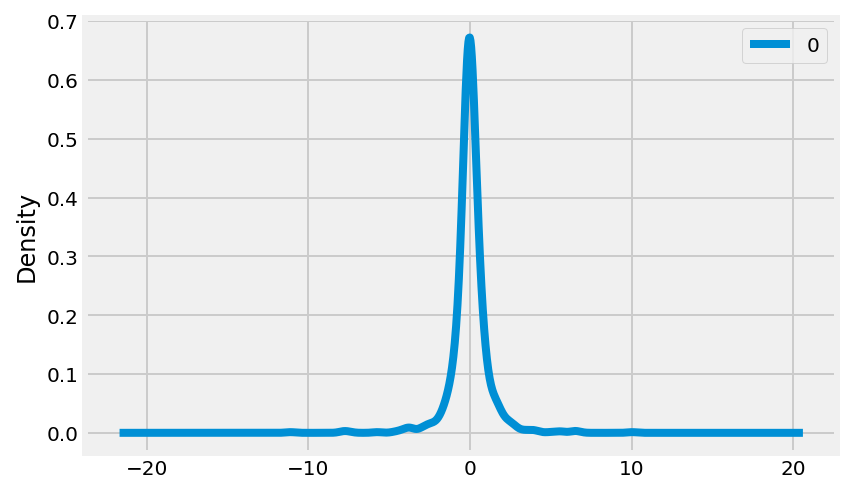

In [92]:
residuals.plot(kind='kde')

In [93]:
residuals.describe()

,0
count,1188.000000
mean,-0.000045
std,1.172989
min,-11.116472
25%,-0.301531
50%,-0.021041
75%,0.349168
max,10.033348


In [94]:
train_arima = train_data['Close_shift'].values
test_arima = test_data['Close_shift'].values

In [95]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_arima]
print(type(history))
predictions = list()
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(train_arima)+t-1, end = len(train_arima)+t,dynamic=True)
    #output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_arima, predictions)
print('MSE : %.3f' % error)
error2 = math.sqrt(error)
print('RMSE : %.3f' % error2)

<class 'list'>
MSE : 10.634
RMSE : 3.261


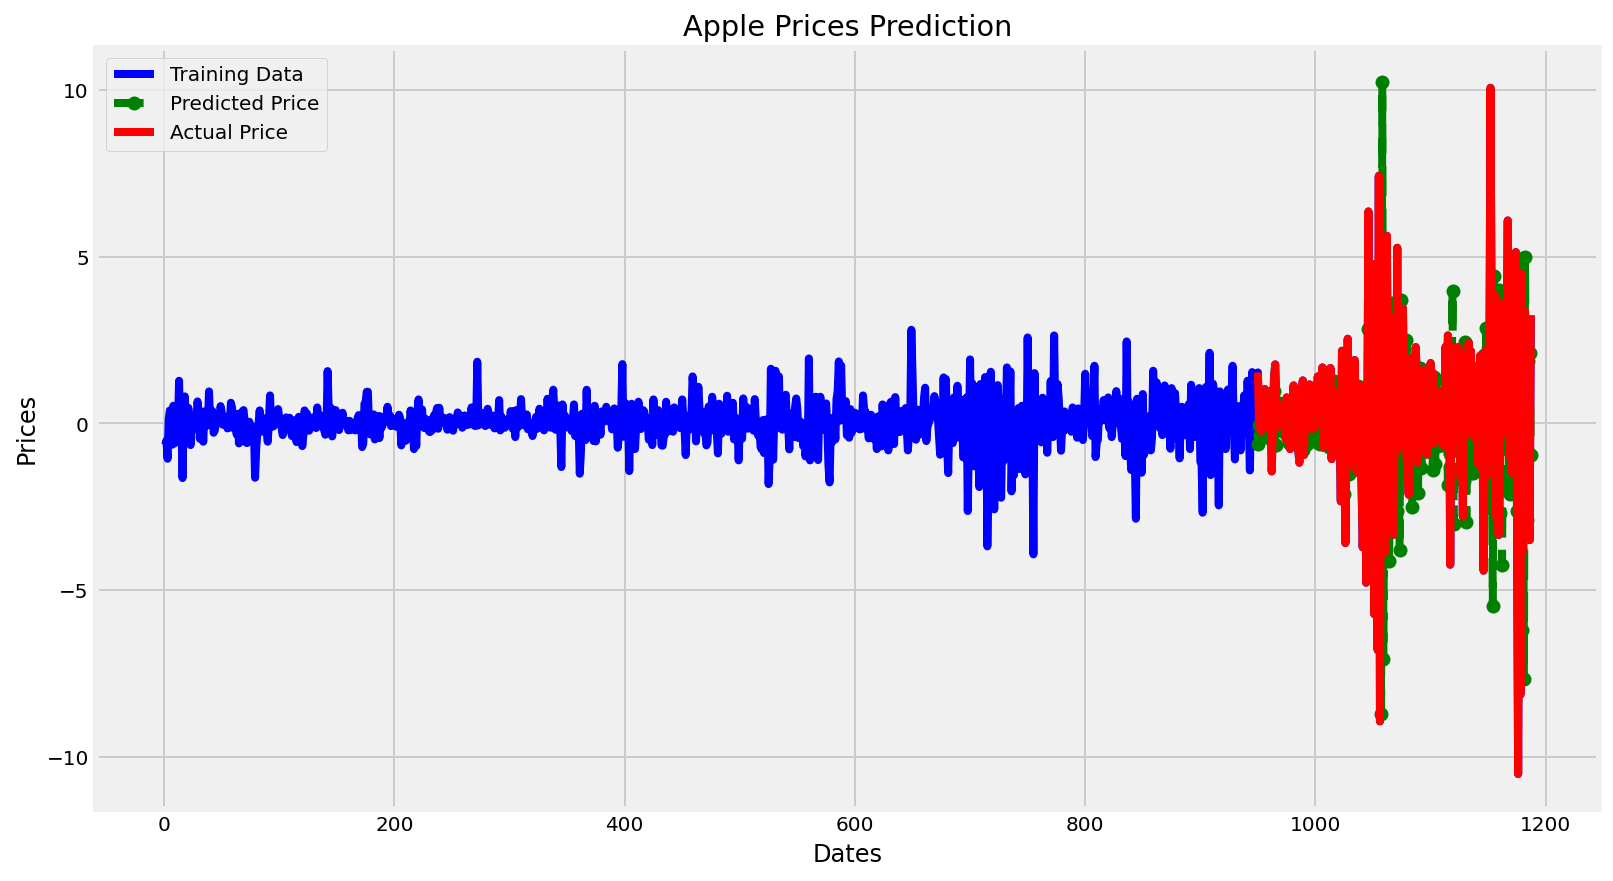

In [96]:
plt.figure(figsize=(12,7))
plt.plot(df['Close_shift'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
     